## Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras import layers
from keras.layers import Dense, BatchNormalization, MaxPooling1D, Conv1D, Flatten, Dropout, LeakyReLU
from keras.optimizers import SGD, Adam
from keras import losses
from keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import pylab as py

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving train_genetic_disorders.csv to train_genetic_disorders.csv


## Reading data from csv file

In [ ]:
data = pd.read_csv("train_genetic_disorders.csv")

## Visualizing the dataframe

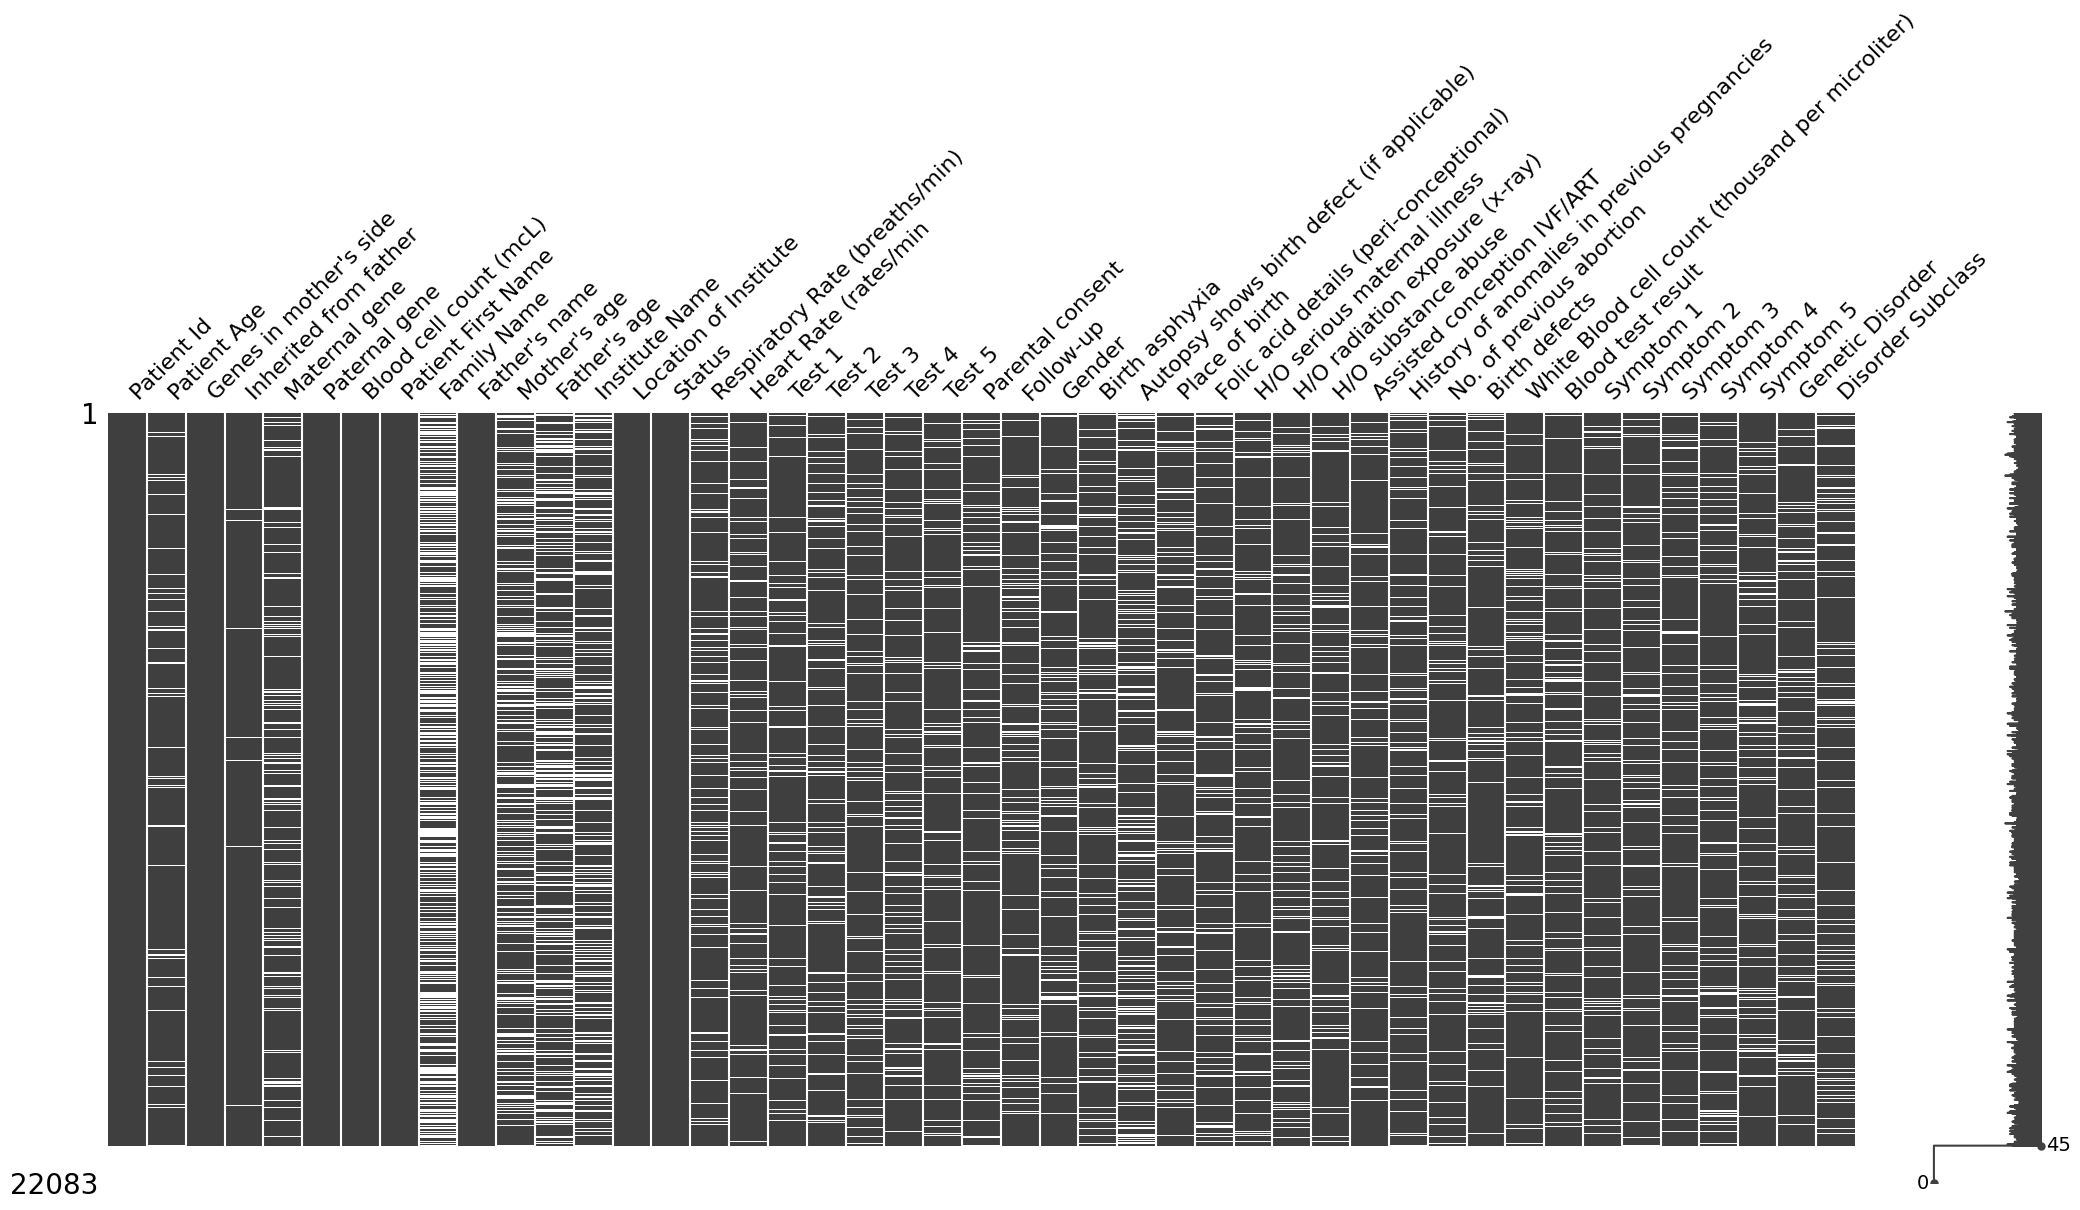

In [ ]:
msno.matrix(data)
plt.show()

## Percentage of non-empty entries column-wise

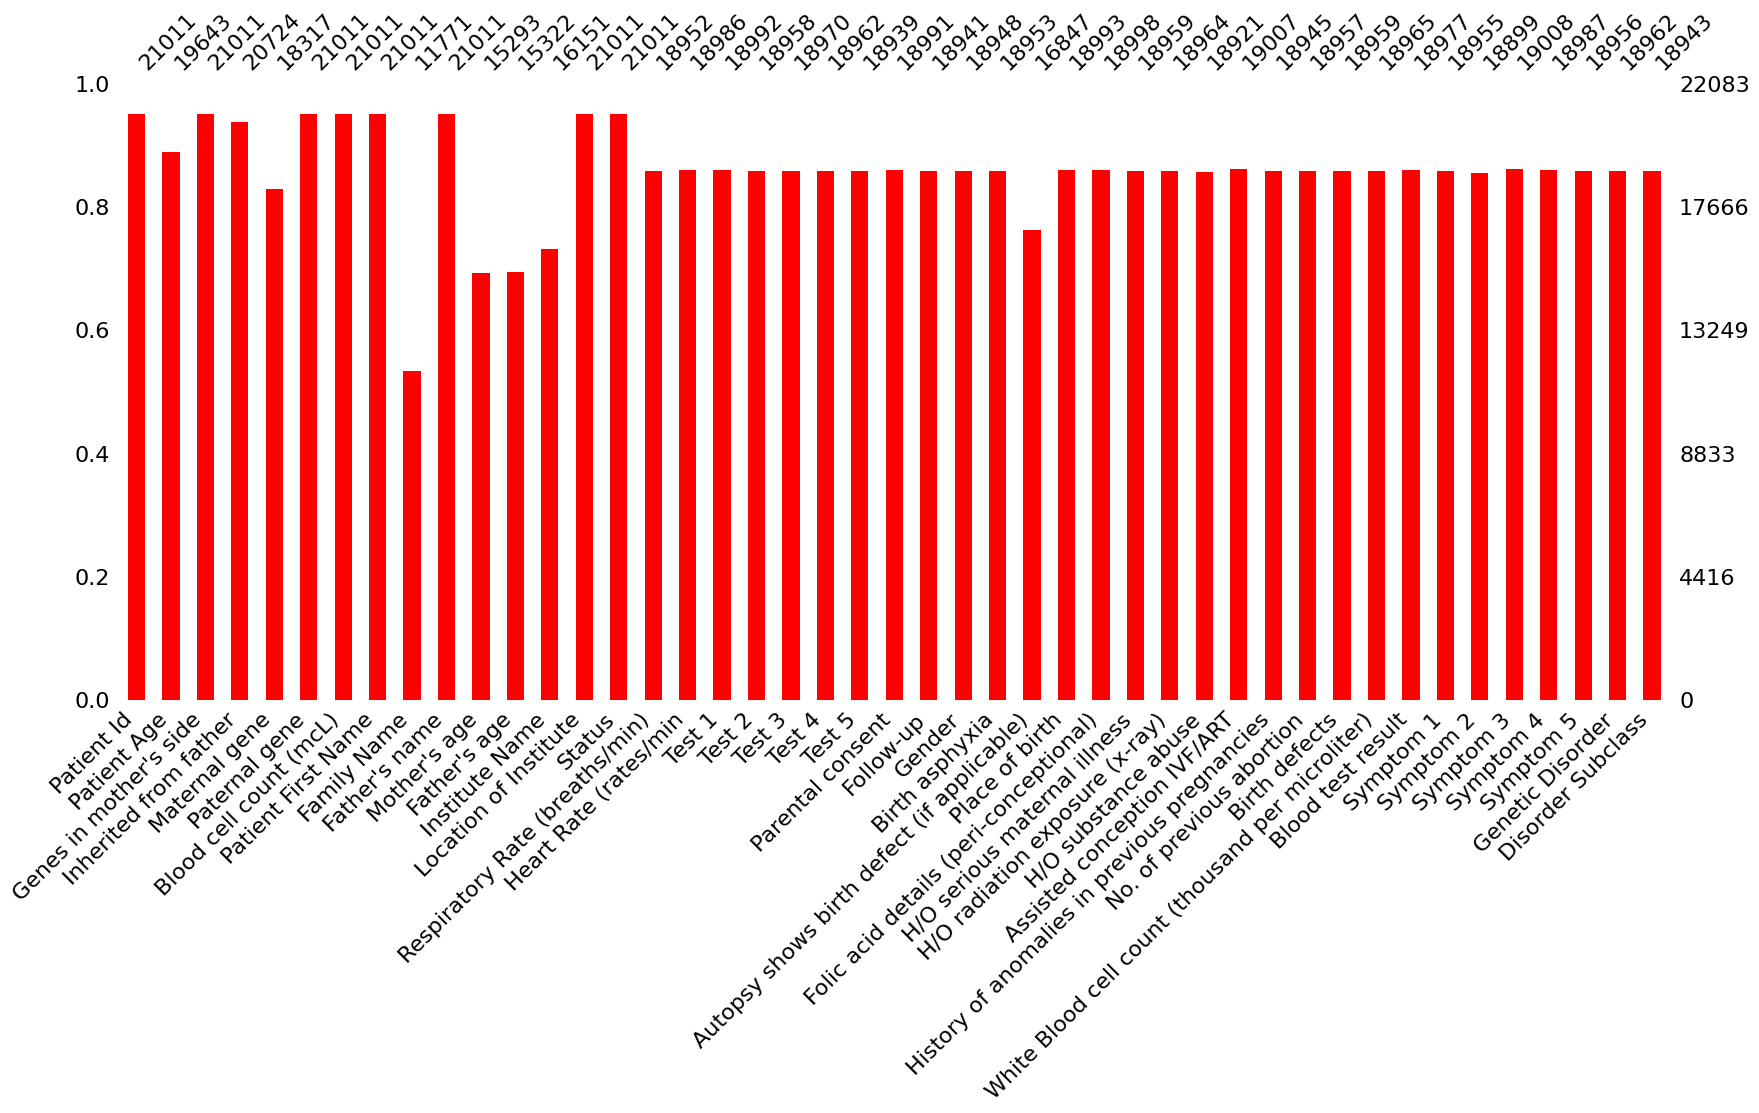

In [ ]:
msno.bar(data, color='r', figsize=(20, 8))
plt.show()

## Dropping columns that don't contribute towards making the model

In [ ]:
drop_cols = ["Patient Id", "Patient First Name", "Family Name", "Father's name", "Institute Name",
             "Location of Institute", "Mother's age", "Father's age",
             "Test 1", "Test 2", "Test 3", "Test 4", "Test 5", "Parental consent", "Place of birth"]
data.drop(drop_cols, inplace=True, axis=1)

## Replace missing values with Nan

In [ ]:
data.replace('', np.NaN)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,Alive,Normal (30-60),Normal,High,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,Deceased,Tachypnea,Normal,High,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,Alive,Normal (30-60),Tachycardia,Low,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,Deceased,Tachypnea,Normal,High,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,Alive,Tachypnea,Tachycardia,Low,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Segmenting columns into categorical and numeric type

In [ ]:
encode_cols_x = ["Genes in mother's side", "Inherited from father", "Maternal gene", "Paternal gene", "Status",
                 "Respiratory Rate (breaths/min)", "Heart Rate (rates/min", "Follow-up", "Gender", "Birth asphyxia",
                 "Autopsy shows birth defect (if applicable)", "Folic acid details (peri-conceptional)",
                 "H/O serious maternal illness", "H/O radiation exposure (x-ray)", "H/O substance abuse",
                 "Assisted conception IVF/ART", "History of anomalies in previous pregnancies", "Birth defects",
                 "Blood test result", "Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5"]

num_cols_x = ["Patient Age", "Blood cell count (mcL)", "No. of previous abortion",
              "White Blood cell count (thousand per microliter)"]

encode_cols_y = ["Genetic Disorder", "Disorder Subclass"]

<Axes: xlabel='Patient Age', ylabel='Genetic Disorder'>

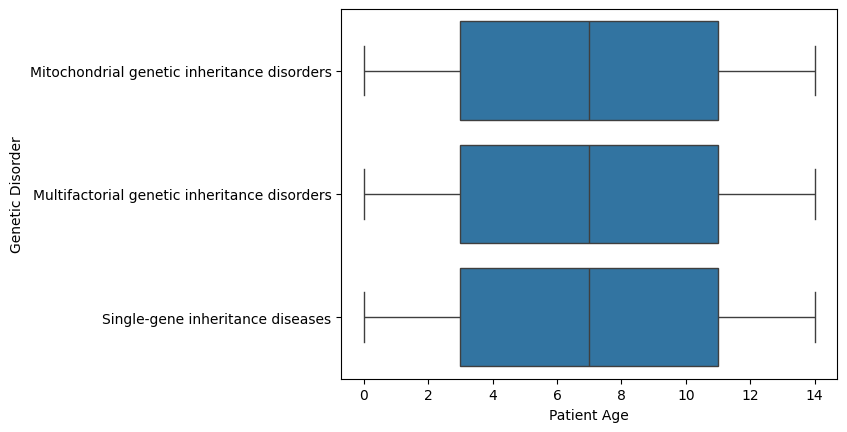

In [ ]:
sns.boxplot(data=data, x=data["Patient Age"], y=data["Genetic Disorder"])

<Axes: xlabel='Blood cell count (mcL)', ylabel='Genetic Disorder'>

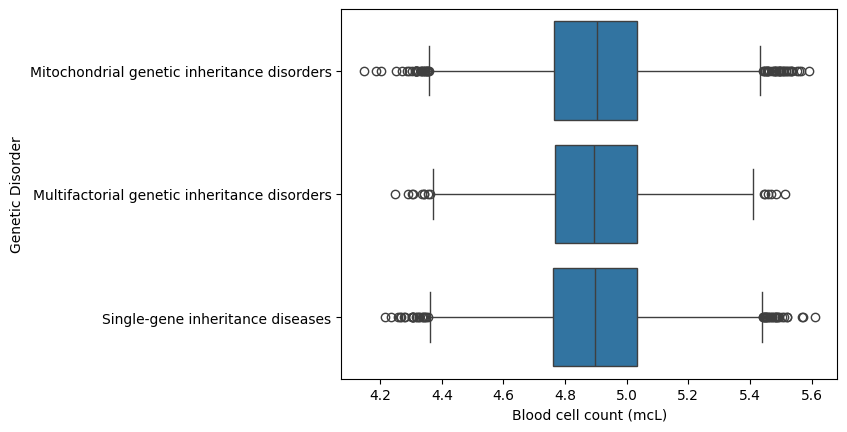

In [ ]:
sns.boxplot(data=data, x=data["Blood cell count (mcL)"], y=data["Genetic Disorder"])

## Replacing outliers with the minimum and maximum permissible value

In [ ]:
Q1 = data["Blood cell count (mcL)"].quantile(0.25)
Q3 = data["Blood cell count (mcL)"].quantile(0.75)
IQR = Q3-Q1
min_permissible = Q1-1.5*IQR
max_permissible = Q3+ 1.5*IQR
data["Blood cell count (mcL)"] = np.where(data["Blood cell count (mcL)"]<min_permissible, min_permissible, data["Blood cell count (mcL)"])
data["Blood cell count (mcL)"] = np.where(data["Blood cell count (mcL)"]>max_permissible, max_permissible, data["Blood cell count (mcL)"])

## Boxplot after replacing the outliers

<Axes: xlabel='Blood cell count (mcL)', ylabel='Genetic Disorder'>

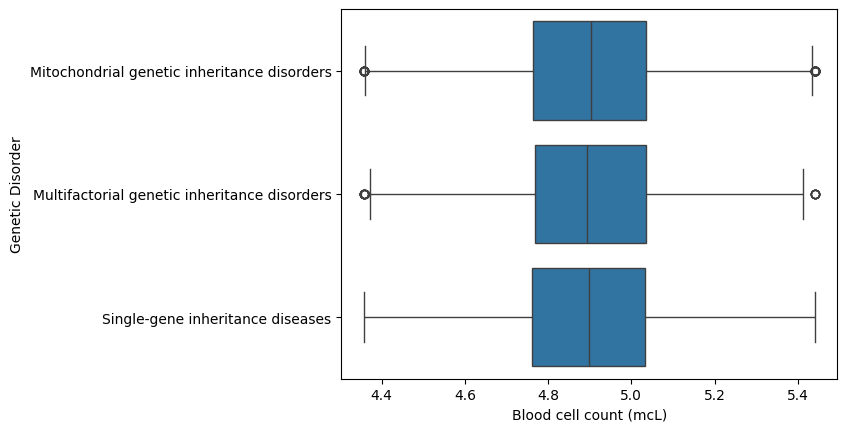

In [ ]:
sns.boxplot(data=data, x=data["Blood cell count (mcL)"], y=data["Genetic Disorder"])

<Axes: xlabel='No. of previous abortion', ylabel='Genetic Disorder'>

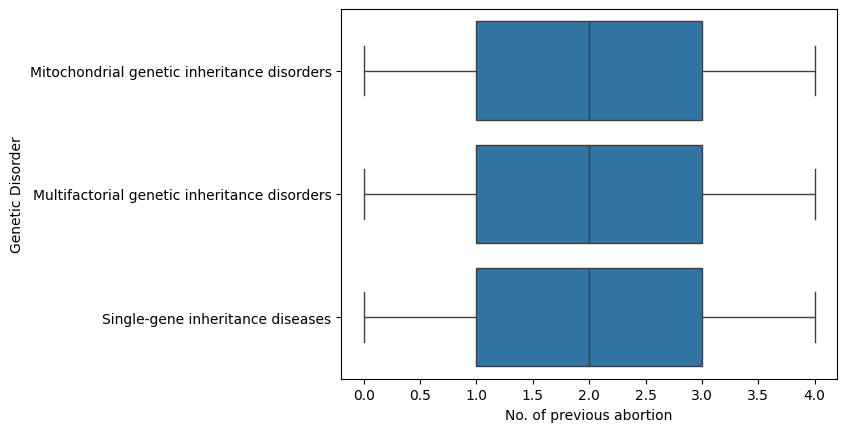

In [ ]:
sns.boxplot(data=data, x=data["No. of previous abortion"], y=data["Genetic Disorder"])

<Axes: xlabel='White Blood cell count (thousand per microliter)', ylabel='Genetic Disorder'>

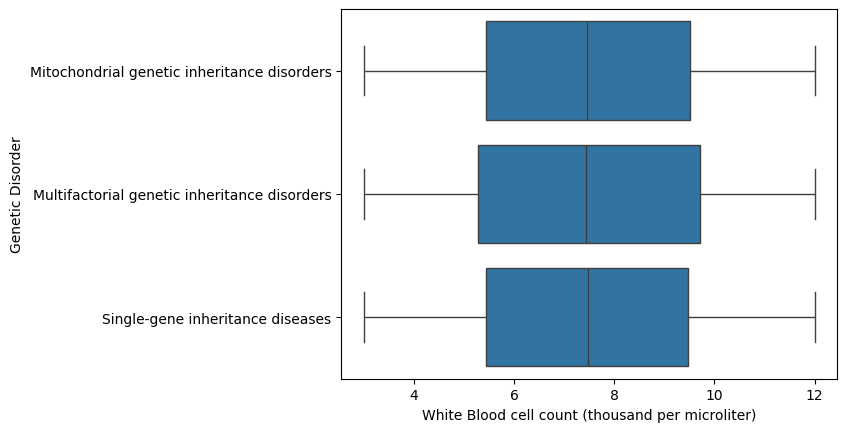

In [ ]:
sns.boxplot(data=data, x=data["White Blood cell count (thousand per microliter)"], y=data["Genetic Disorder"])

## Pre-processing data

In [ ]:
cols_x_imputed = []
cols_y_imputed = []

data["Blood cell count (mcL)"] = data["Blood cell count (mcL)"].round(3)
data["White Blood cell count (thousand per microliter)"] = data["White Blood cell count (thousand per microliter)"].round(3)


for col in encode_cols_x:
    mode = data[col].mode()[0]
    data[col + "_imputed"] = data[col]
    data[col + "_imputed"].fillna(mode, inplace=True)

for col in encode_cols_y:
    mode = data[col].mode()[0]
    data[col + "_imputed"] = data[col]
    data[col + "_imputed"].fillna(mode, inplace=True)

## Dropping columns after doing pre-processing

In [ ]:
for col in encode_cols_x:
    col += "_imputed"
    cols_x_imputed.append(col)
data.drop(encode_cols_x, inplace=True, axis=1)

for col in encode_cols_y:
    col = col + "_imputed"
    cols_y_imputed.append(col)
data.drop(encode_cols_y, inplace=True, axis=1)

## Transforming categorical columns by use of LabelEncoder method

In [ ]:
data[cols_x_imputed] = data[cols_x_imputed].apply(LabelEncoder().fit_transform)
data[cols_y_imputed] = data[cols_y_imputed].apply(LabelEncoder().fit_transform)
y1 = np.array(data[cols_y_imputed[0]])
y2 = np.array(data[cols_y_imputed[1]])
data.drop(cols_y_imputed, inplace=True, axis=1)

## Replacing missing values in numeric cols by mean of that column

In [ ]:
for col in num_cols_x:
    mean = data[col].mean()
    data[col].fillna(mean, inplace=True)

new_x = np.array(data[num_cols_x])
pca = PCA(n_components=2)
pca.fit_transform(new_x)

array([[-4.99184936e+00,  2.33744201e+00],
       [-2.96066442e+00, -1.98301180e+00],
       [-9.79881079e-01,  7.82031686e-04],
       ...,
       [-8.94532537e-16,  8.81759949e-16],
       [-8.94532537e-16,  8.81759949e-16],
       [-8.94532537e-16,  8.81759949e-16]])

<Axes: >

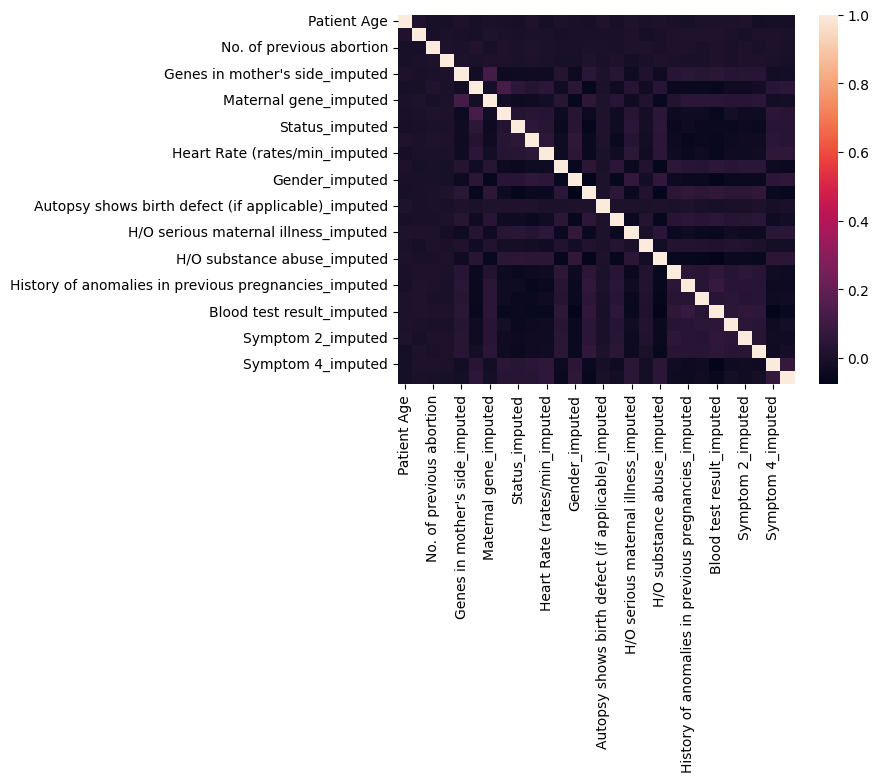

In [ ]:
ax = sns.heatmap(data.corr())
ax

In [ ]:
x = np.array(data)

print(x.shape)

(22083, 28)


## Evaluating the importance of each column

                                            Attribute  Importance
27                                  Symptom 5_imputed    0.157062
26                                  Symptom 4_imputed    0.102950
25                                  Symptom 3_imputed    0.083933
1                              Blood cell count (mcL)    0.069789
24                                  Symptom 2_imputed    0.065349
3    White Blood cell count (thousand per microliter)    0.051310
0                                         Patient Age    0.042914
4                      Genes in mother's side_imputed    0.036110
23                                  Symptom 1_imputed    0.035630
5                       Inherited from father_imputed    0.031421
2                            No. of previous abortion    0.030487
18                        H/O substance abuse_imputed    0.030232
22                          Blood test result_imputed    0.029751
7                               Paternal gene_imputed    0.028743
13        

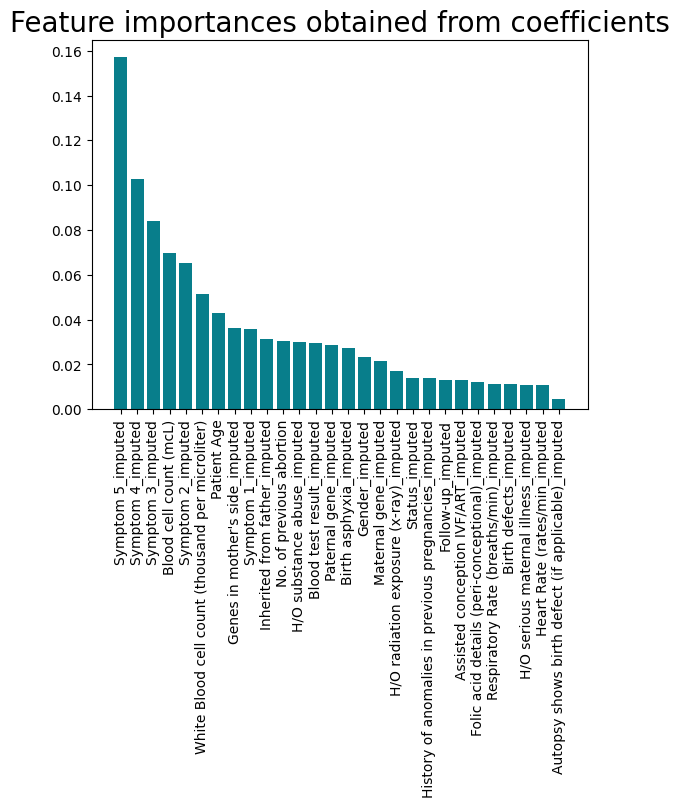

In [ ]:
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.25, random_state=0)
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

model = RandomForestClassifier(n_estimators=50, min_samples_leaf=25, criterion='entropy', random_state=1, max_depth=100)
model.fit(x_train_scaled, y_train)
predicted = model.predict(x_test_scaled)

importances = pd.DataFrame(data={
    'Attribute': data.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
print(importances)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
total_null = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum() / data.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data)

print(np.isnan(x).any())
# print(x[:10])

False


## Splitting the data into training and testing dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.25)

## Training the model on the Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(x_train, y_train)
print('The accuracy obtained by training the model on the Gaussian Naive Bayes Algorith is', round(model.score(x_train, y_train), 3))

The accuracy obtained by training the model on the Gaussian Naive Bayes Algorith is 0.558


## Training the model on the Support Vector Machine Algorithm

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear', 'poly', 'rbf']
#               }

# model = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
model = SVC(kernel='rbf', C=1, gamma=0.001)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
# print(grid.best_params_)
# print(grid.best_estimator_)

0.5779495230044681


## Training the model on the Decision Tree Classifer Algorithm

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))

1.0


[Text(0.4911238973061399, 0.9827586206896551, 'x[27] <= 0.5\ngini = 0.549\nsamples = 16562\nvalue = [9572, 1524, 5466]'),
 Text(0.23611144661203523, 0.9482758620689655, 'x[24] <= 0.5\ngini = 0.498\nsamples = 9994\nvalue = [6202, 401, 3391]'),
 Text(0.11176833618721461, 0.9137931034482759, 'x[26] <= 0.5\ngini = 0.515\nsamples = 3732\nvalue = [2075, 93, 1564]'),
 Text(0.05136400236464449, 0.8793103448275862, 'x[25] <= 0.5\ngini = 0.528\nsamples = 2022\nvalue = [958, 59, 1005]'),
 Text(0.019359915198956294, 0.8448275862068966, 'x[23] <= 0.5\ngini = 0.504\nsamples = 754\nvalue = [242, 41, 471]'),
 Text(0.006426940639269406, 0.8103448275862069, 'x[0] <= 6.487\ngini = 0.473\nsamples = 268\nvalue = [57, 27, 184]'),
 Text(0.003679060665362035, 0.7758620689655172, 'x[1] <= 5.12\ngini = 0.341\nsamples = 123\nvalue = [18, 7, 98]'),
 Text(0.0025570776255707762, 0.7413793103448276, 'x[6] <= 0.5\ngini = 0.288\nsamples = 109\nvalue = [12, 6, 91]'),
 Text(0.0015655577299412916, 0.7068965517241379, 'x[

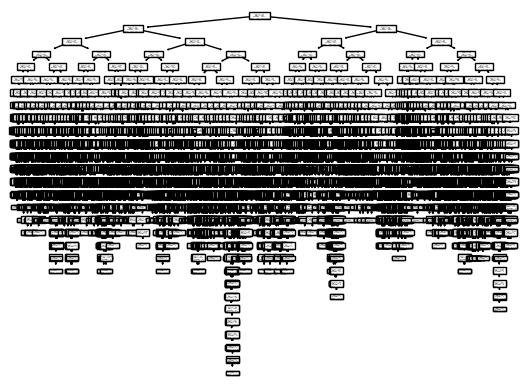

In [ ]:
tree.plot_tree(model)

## Training the data on Conv1D dataset and testing the accuracy by the plots

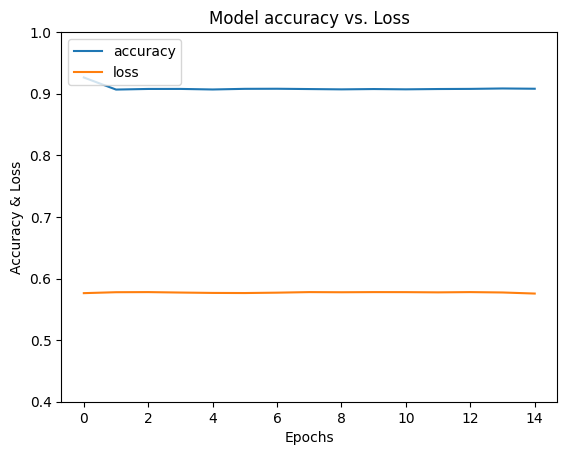

In [ ]:
model = Sequential()
model.add(Conv1D(256, 5, activation="relu", input_shape=(28, 1)))
model.add(Dropout(0.25))
# model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(512, 5, activation="relu", padding="same"))
model.add(Dropout(0.25))
# model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(256, 5, activation="relu", padding="same"))
model.add(Dropout(0.25))
# model.add(MaxPooling1D(2, padding='same'))
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(3, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(learning_rate=1), metrics=['accuracy'])

my_model = model.fit(x_train, y_train, epochs=15, verbose=0)
testing = model.evaluate(x_test, y_test, verbose=0)

plt.plot(my_model.history['loss'])
plt.plot(my_model.history['accuracy'])
plt.title("Model accuracy vs. Loss")
plt.ylabel('Accuracy & Loss')
plt.xlabel("Epochs")
plt.ylim(bottom=0.4, top=1)
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()